<a href="https://colab.research.google.com/github/marcinBrzew/Todo/blob/master/Bollinger_Bands_%2B_SMA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance
!pip install backtesting
import yfinance as yf 
import  numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import plotly.graph_objects as go

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 175 kB 5.5 MB/s 
  Created wheel for backtesting: filename=Backtesting-0.3.3-py3-none-any.whl size=173842 sha256=f2f85193b9ef49d1079b7ecdac80b9197f0b400bd4f6f2cfc2f379d85da1ba8a
  Stored in directory: /root/.cache/pip/wheels/48/1d/ea/65dacebc37da7655d8a1fd0f315ac39d102e31d6545237a1c6
Successfully built backtesting


In [9]:
df=yf.download(tickers='EURUSD=X', period='1d', interval='5m')
df['SMA']=df.Close.rolling(window=14).mean()
df['EMA']=df.Close.ewm(span=6).mean()
df['stddev']=df.Close.rolling(window=14).std()
df['Upper']=df.SMA +2*df.stddev
df['Lower']=df.SMA -2*df.stddev
df=df.dropna()



[*********************100%***********************]  1 of 1 completed


In [3]:

buys=[]
sells=[]
open_pos=False

for i in range(len(df)):
   if df.Open[i]<df.Close[i]: #Zielona Swieca 
      if df.Open[i] <df.EMA[i]:
        if df.Close[i]>df.EMA[i]:
          if df.EMA[i-1]<df.EMA[i]:
            if df.SMA[i]<df.EMA[i]:
              buys.append(i)
              open_pos=True
   elif df.Open[i]>df.Close[i]: #Czerwona Swieca 
      if df.Open[i] >df.EMA[i]:
        if df.Close[i]<df.EMA[i]:
          if df.EMA[i-1]>df.EMA[i]:
            if df.Close[i]>df.Lower[i]:           
              sells.append(i)
              open_pos=True


In [3]:
# Only candles crossed by EMA and candle before oposite
buys=[]
sells=[]
open_pos=False

for i in range(len(df)):
   if df.Open[i]<df.Close[i]: #Zielona Swieca 
      if df.Open[i] <df.EMA[i]:# Przechodzi EMA przez swiece
        if df.Close[i]>df.EMA[i]:# Przechodzi EMA przez swiece
          if df.Open[i] <df.SMA[i]:# Przechodzi SMA przez swiece
            if df.Close[i]>df.SMA[i]:# Przechodzi SMA przez swiece
             if df.EMA[i-1]<df.EMA[i]:# EMA jest rosnace
               if df.Open[i-1] >df.Close[i-1]:#poprzednia swieca jest Czerwona
                   buys.append(i)
                   open_pos=True
   elif df.Open[i]>df.Close[i]: #Czerwona Swieca 
      if df.Open[i] >df.EMA[i]:# Przechodzi EMA przez swiece
        if df.Close[i]<df.EMA[i]:# Przechodzi EMA przez swiece
          if df.Open[i] >df.SMA[i]:# Przechodzi SMA przez swiece
           if df.Close[i]<df.SMA[i]:# Przechodzi SMA przez swiece
             if df.EMA[i-1]>df.EMA[i]:# EMA jest malejace
               if df.Open[i-1] <df.Close[i-1]:#poprzednia swieca jest Zielona           
                   sells.append(i)
                   open_pos=True

In [10]:
# Only candles crossed by EMA and SMA and candle
buys=[]
sells=[]
open_pos=False

for i in range(len(df)):
   if df.Open[i]<df.Close[i]: #Zielona Swieca 
      if df.Open[i] <df.EMA[i]:# Przechodzi EMA przez swiece
        if df.Close[i]>df.EMA[i]:# Przechodzi EMA przez swiece
          if df.Open[i] <df.SMA[i]:# Przechodzi SMA przez swiece
            if df.Close[i]>df.SMA[i]:# Przechodzi SMA przez swiece
             if df.EMA[i-2]<df.EMA[i]:# EMA jest rosnace
                  buys.append(i)
                  open_pos=True
   elif df.Open[i]>df.Close[i]: #Czerwona Swieca 
      if df.Open[i] >df.EMA[i]:# Przechodzi EMA przez swiece
        if df.Close[i]<df.EMA[i]:# Przechodzi EMA przez swiece
          if df.Open[i] >df.SMA[i]:# Przechodzi SMA przez swiece
           if df.Close[i]<df.SMA[i]:# Przechodzi SMA przez swiece
             if df.EMA[i-2]>df.EMA[i]:# EMA jest malejace         
                  sells.append(i)
                  open_pos=True

In [3]:
# Only green candles Over SMA &EMA and oposite !!!
buys=[]
sells=[]
open_pos=False

for i in range(len(df)):
   if df.Open[i]<df.Close[i]: #Zielona Swieca 
      if df.Open[i] <df.EMA[i]:#EMA przechodzi przez swiece 
        if df.Close[i]>df.EMA[i]:
          if df.EMA[i-1]<df.EMA[i]: #SMA jest Rosnace 
            if df.Close[i]> df.SMA[i]:#SMA jest ponizej Close
              buys.append(i)
              open_pos=True           
   elif df.Open[i]>df.Close[i]: #Czerwona Swieca 
      if df.Open[i] >df.EMA[i]:#EMA przechodzi przez Swiece
        if df.Close[i]<df.EMA[i]:
          if df.EMA[i-1]>df.EMA[i]:# SMA jest Malejace
            if df.Close[i]<df.SMA[i]:#Swieca jest pod SMA         
              sells.append(i)
              open_pos=True

In [1]:
# Green candle after red candle after cross SMA
buys=[]
sells=[]
open_pos=False

for i in range(len(df)):
   if df.Open[i]<df.Close[i]: #Zielona Swieca 
      if df.Open[i-1] >df.Close[i-1]:#poprzednia swieca jest czerwona  
        if df.EMA[i]>df.SMA[i]:
          if df.EMA[i-1]<df.EMA[i]: #EMA jest Rosnace 
            if df.Close[i]> df.SMA[i]:#SMA jest powyzej Close
              if df.Close[i]<df.Upper[i]: 
                buys.append(i)
                open_pos=True           
   elif df.Open[i]>df.Close[i]: #Czerwona Swieca 
      if df.Open[i-1]<df.Close[i-1]:#poprzednia wieca jest zielona 
        if df.SMA[i]>df.EMA[i]:
          if df.EMA[i-1]>df.EMA[i]:# EMA jest Malejace
            if df.Close[i]<df.SMA[i]:#Swieca jest pod SMA   
              if df.Close[i]>df.Lower[i]:      
                sells.append(i)
                open_pos=True

NameError: ignored

In [5]:
buys


[6, 10, 16, 23, 27, 30, 42, 59, 103, 120, 140]

In [6]:
sells

[4, 11, 31, 43, 72, 137, 176]

In [11]:
#Open Positions 
#for i in range(len(buys#)):
#  if open_pos=True
#    open_pos[i+2]=False

SyntaxError: ignored

In [7]:
If boolean:
  open_pos[i]=true
  open_pos.iloc(i+2)=false

SyntaxError: ignored

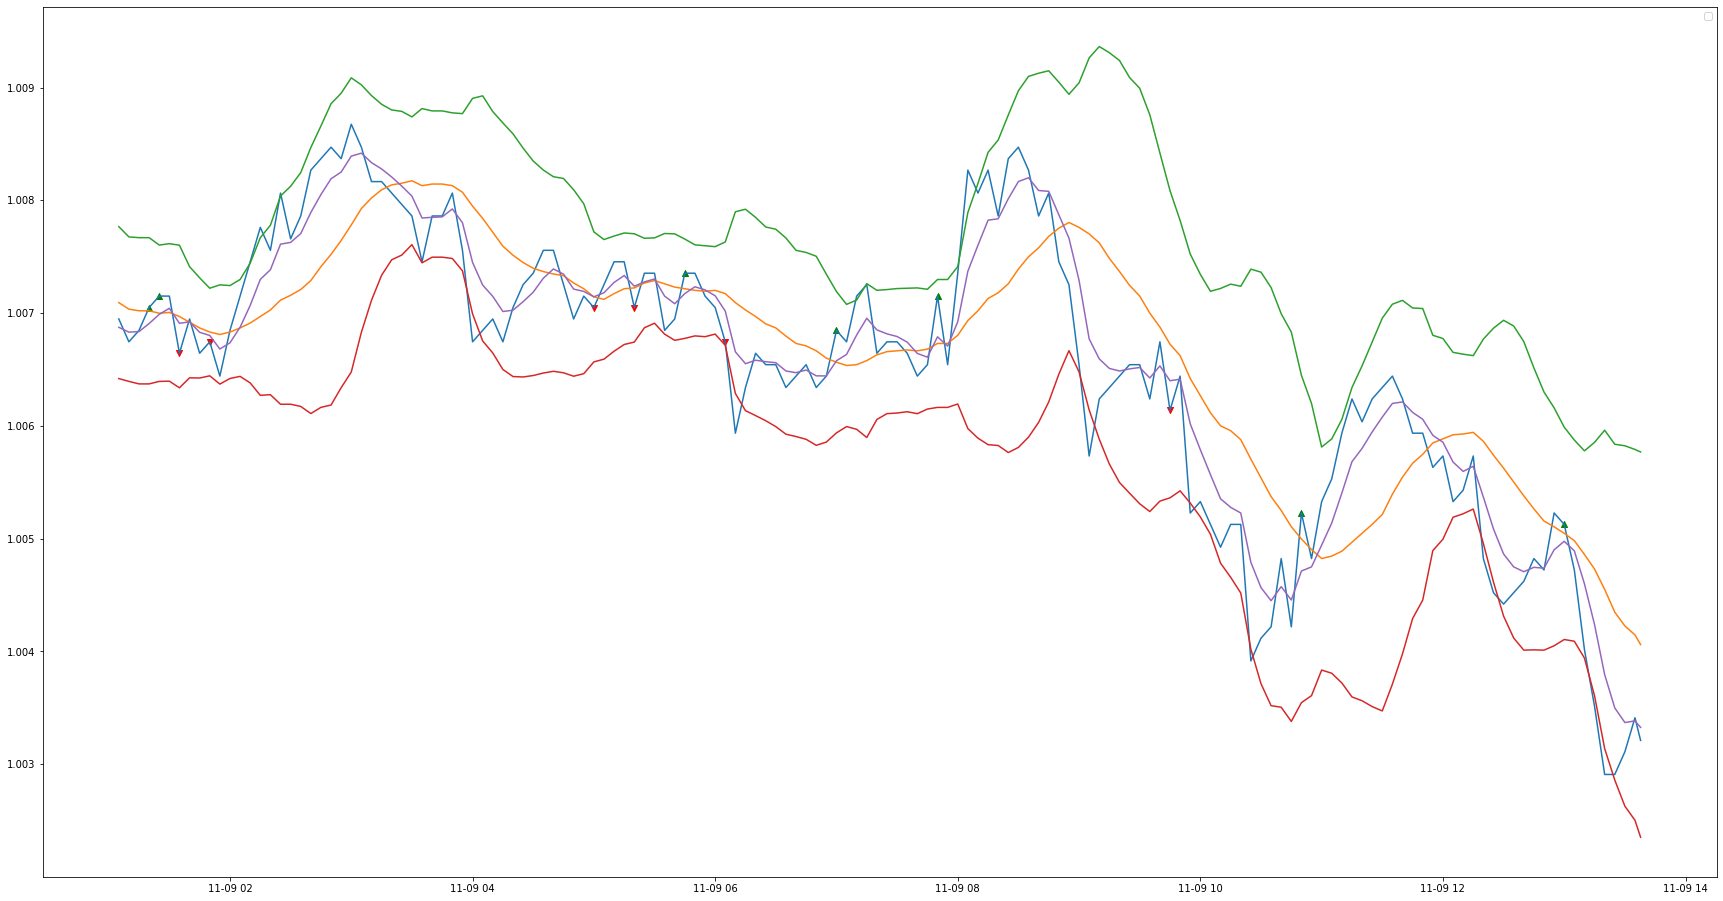

In [8]:
plt.figure(figsize=(30,16))
plt.scatter(df.iloc[buys].index, df.iloc[buys].Close, marker='^',color='g')
plt.scatter(df.iloc[sells].index, df.iloc[sells].Close, marker='v',color='r')
plt.plot(df[['Close','SMA','Upper','Lower','EMA']])
plt.legend()
plt.show()
fig = go.Figure(data=[go.Candlestick(
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])
ema_trace = go.Scatter(x=df['Close'], y=df['EMA'], mode='lines', name='6 EMA')
fig.add_trace(ema_trace)
fig.show()